# Modeling Attempt #2:

## Using a RandomForestRegressor:
The ensemble learning technique implement by RandomForestRegressor will help create a more accurate model and stable prediction. I plan to implement boosting and bootstrapping techniques to improve the model's performance.




In [8]:
import pandas as pd
import numpy as np
import sklearn.pipeline as pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

df = pd.read_csv('cleaned_data.csv')
df.head()

,Team,Home/Away,Opp,MP_G,FG_G,FGA_G,FG%_G,3P_G,3PA_G,3P%_G,...,FT%_Sn,ORB_Sn,DRB_Sn,TRB_Sn,AST_Sn,STL_Sn,BLK_Sn,TOV_Sn,PF_Sn,PTS_Sn
0,DAL,Away,PHO,19,1,3,0.333,1,3,0.333,...,0.725,0.3,2.0,2.3,3.2,0.5,0.1,1.2,1.7,9.3
1,DAL,Home,MIN,20,3,7,0.429,1,4,0.250,...,0.725,0.3,2.0,2.3,3.2,0.5,0.1,1.2,1.7,9.3
2,DAL,Home,CHI,14,2,7,0.286,2,4,0.500,...,0.725,0.3,2.0,2.3,3.2,0.5,0.1,1.2,1.7,9.3
3,DAL,Away,ATL,18,3,9,0.333,0,3,0.000,...,0.725,0.3,2.0,2.3,3.2,0.5,0.1,1.2,1.7,9.3
4,DAL,Away,TOR,29,3,11,0.273,2,4,0.500,...,0.725,0.3,2.0,2.3,3.2,0.5,0.1,1.2,1.7,9.3


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 70 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Team          467 non-null    object 
 1   Home/Away     467 non-null    object 
 2   Opp           467 non-null    object 
 3   MP_G          467 non-null    int64  
 4   FG_G          467 non-null    int64  
 5   FGA_G         467 non-null    int64  
 6   FG%_G         467 non-null    float64
 7   3P_G          467 non-null    int64  
 8   3PA_G         467 non-null    int64  
 9   3P%_G         467 non-null    float64
 10  FT_G          467 non-null    int64  
 11  FTA_G         467 non-null    int64  
 12  FT%_G         467 non-null    float64
 13  ORB_G         467 non-null    int64  
 14  DRB_G         467 non-null    int64  
 15  TRB_G         467 non-null    int64  
 16  AST_G         467 non-null    int64  
 17  STL_G         467 non-null    int64  
 18  BLK_G         467 non-null    

In [10]:
df.columns


Index(['Team', 'Home/Away', 'Opp', 'MP_G', 'FG_G', 'FGA_G', 'FG%_G', '3P_G',
       '3PA_G', '3P%_G', 'FT_G', 'FTA_G', 'FT%_G', 'ORB_G', 'DRB_G', 'TRB_G',
       'AST_G', 'STL_G', 'BLK_G', 'TOV_G', 'PF_G', 'PTS_G', 'GmSc',
       'Plus/Minus_G', 'W/L_Margin', 'Season', 'Ttl_MP_Sn', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'ValORP',
       'Avg_MP_Sn', 'FG_Sn', 'FGA_Sn', 'FG%_Sn', '3P_Sn', '3PA_Sn', '3P%_Sn',
       '2P_Sn', '2PA_Sn', '2P%_Sn', 'eFG%_Sn', 'FT_Sn', 'FTA_Sn', 'FT%_Sn',
       'ORB_Sn', 'DRB_Sn', 'TRB_Sn', 'AST_Sn', 'STL_Sn', 'BLK_Sn', 'TOV_Sn',
       'PF_Sn', 'PTS_Sn'],
      dtype='object')

In [12]:
df['W/L_Margin'].value_counts()

W/L_Margin
-4     21
 6     17
 4     17
-10    16
-6     15
       ..
 42     1
 48     1
 35     1
-20     1
 44     1
Name: count, Length: 73, dtype: int64

## Building the model pipeline

Prep the data

In [11]:
# Get numerical and categorical columns
categorical_columns = df[['Team', 'Home/Away', 'Opp', 'Season']]
categorical_columns

numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_features = [col for col in numerical_features if col not in ['W/L_Margin']]

categorical_features = categorical_columns.columns.tolist()

print("Numerical features:", numerical_features)
print("Categorical features:", categorical_features)

Numerical features: ['MP_G', 'FG_G', 'FGA_G', 'FG%_G', '3P_G', '3PA_G', '3P%_G', 'FT_G', 'FTA_G', 'FT%_G', 'ORB_G', 'DRB_G', 'TRB_G', 'AST_G', 'STL_G', 'BLK_G', 'TOV_G', 'PF_G', 'PTS_G', 'GmSc', 'Plus/Minus_G', 'Ttl_MP_Sn', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'ValORP', 'Avg_MP_Sn', 'FG_Sn', 'FGA_Sn', 'FG%_Sn', '3P_Sn', '3PA_Sn', '3P%_Sn', '2P_Sn', '2PA_Sn', '2P%_Sn', 'eFG%_Sn', 'FT_Sn', 'FTA_Sn', 'FT%_Sn', 'ORB_Sn', 'DRB_Sn', 'TRB_Sn', 'AST_Sn', 'STL_Sn', 'BLK_Sn', 'TOV_Sn', 'PF_Sn', 'PTS_Sn']
Categorical features: ['Team', 'Home/Away', 'Opp', 'Season']


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Separate features and target
X = df.drop(columns=['W/L_Margin'])
y = df['W/L_Margin']


# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [14]:
print(X_train.shape)
print(X_test.shape)


(350, 69)
(117, 69)


In [15]:
# one hot encoding the categorical features
# using min max scaler to take care of negative and positive values in the dataset
preprocessor = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(sparse=False), categorical_features),
        ('scaler', MinMaxScaler(feature_range=(-1,1)), numerical_features)
    ], 
    remainder='passthrough'
)

In [16]:
# We will first start with basic parameters and then hyper tune later
from sklearn.pipeline import Pipeline

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(
        random_state=42,
        max_depth=10,
        n_estimators=100,
        bootstrap=True,
        oob_score=True
    ))
])




In [18]:
# Fit the pipeline
rf_pipeline.fit(X_train, y_train)

# Make predictions
y_pred = rf_pipeline.predict(X_test)

#Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
oob_score = rf_pipeline.steps[1][1].oob_score_

print(f"OOB Score: {oob_score}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OOB Score: 0.442301652293999
Mean Squared Error: 115.61048890894801
R^2 Score: 0.3564595979033027


So far this model is performing significantly better than the baseline model. 

The OOB score validates the bagging algorithm and tells us the error rate of the model or the number of correctly predicted data on Out of Bag samples taken for validation. In this case, the model is 44% accurate. 

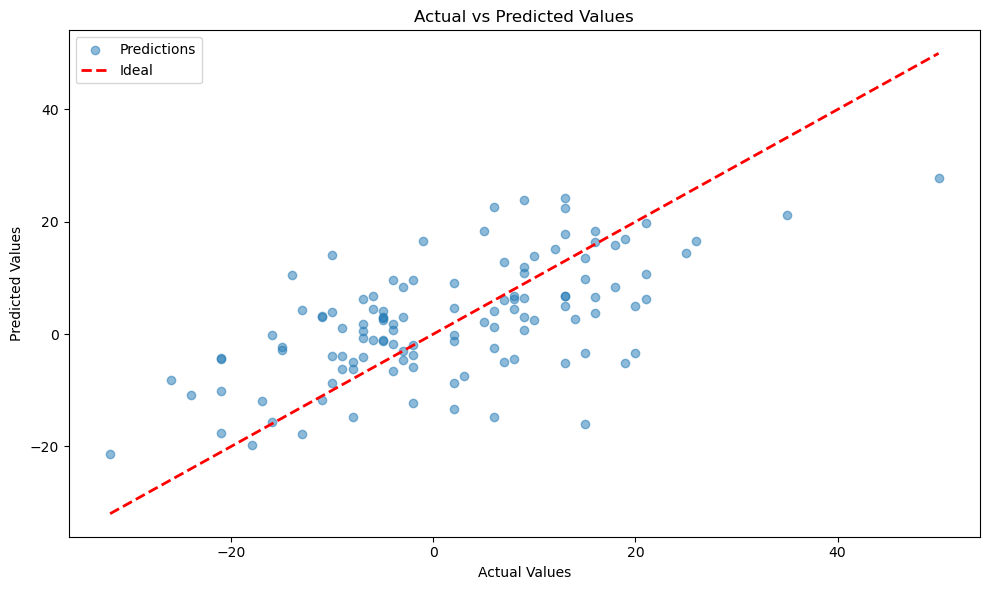

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Actual vs Predicted Values Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.tight_layout()
plt.legend()
plt.show()

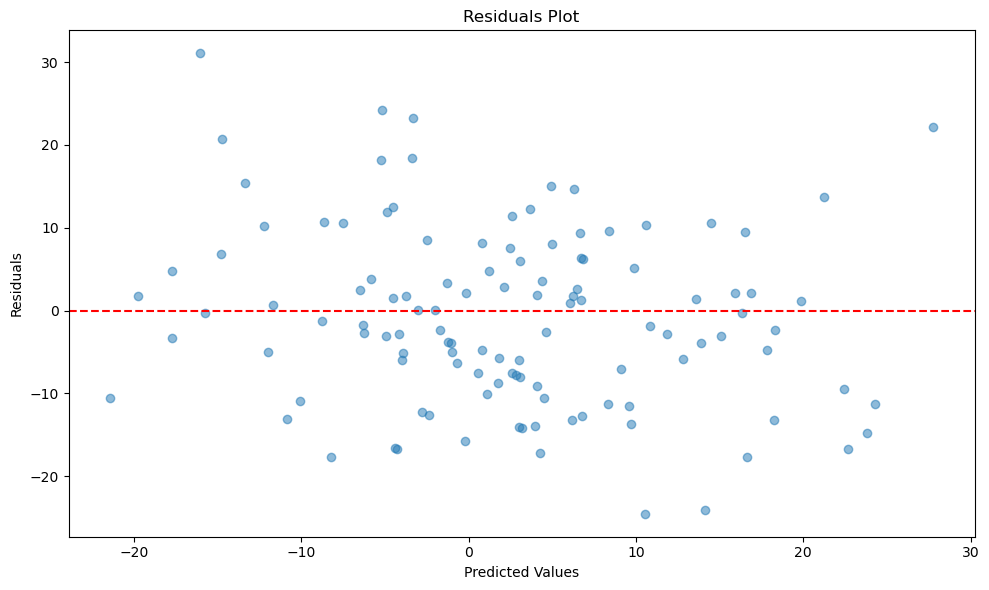

In [21]:
# Residuals Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals Plot')
plt.tight_layout()

plt.show()

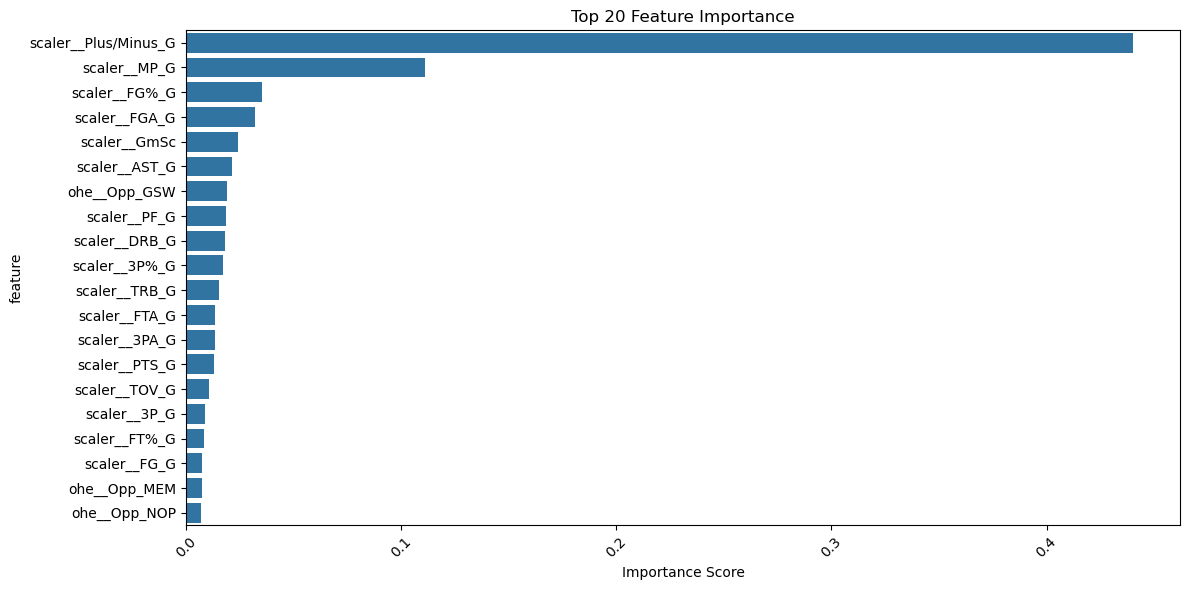

In [27]:
# Feature Importance Plot (top 20 features)
feature_names = preprocessor.get_feature_names_out()

feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': rf_pipeline.named_steps['regressor'].feature_importances_
})

feature_importance = feature_importance.sort_values('importance', ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Top 20 Feature Importance')
plt.xlabel('Importance Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Hyperparameter tuning with GridSearchCV

In [57]:
# We will first start with basic parameters and then hyper tune later
from sklearn.pipeline import Pipeline

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42,
                                        oob_score=True))
])




In [58]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'regressor__n_estimators': [50, 100, 300],
    'regressor__max_depth': [5, 10, 20, 30, 40],
    'regressor__bootstrap': [True],
    

}

grid_search = GridSearchCV(rf_pipeline, 
                           param_grid, 
                           cv=5, 
                           scoring='r2')

grid_search.fit(X_train, y_train)

/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/pr

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         OneHotEncoder(sparse=False),
                                                                         ['Team',
                                                                          'Home/Away',
                                                                          'Opp',
                                                                          'Season']),
                                                                        ('scaler',
                                                                         MinMaxScaler(feature_range=(-1,
                                                                                                     1)),
                                                                         ['MP_G',
                                                                          'FG_G',
                                                                          'FGA_G',
                                                                          'FG%_G',
                                                                          '3P_G',
                                                                          '3PA_G',
                                                                          '3P%_G',
                                                                          'FT_G',
                                                                          'FTA_G',
                                                                          'FT%_G',
                                                                          'ORB_G',
                                                                          'DRB_G',
                                                                          'TRB_G',
                                                                          'AST_G',
                                                                          'STL_G',
                                                                          'BLK_G',
                                                                          'TOV_G',
                                                                          'PF_G',
                                                                          'PTS_G',
                                                                          'GmSc',
                                                                          'Plus/Minus_G',
                                                                          'Ttl_MP_Sn',
                                                                          'PER',
                                                                          'TS%',
                                                                          '3PAr',
                                                                          'FTr',
                                                                          'ORB%',
                                                                          'DRB%',
                                                                          'TRB%',
                                                                          'AST%', ...])])),
                                       ('regressor',
                                        RandomForestRegressor(oob_score=True,
                                                              random_state=42))]),
             param_grid={'regressor__bootstrap': [True],
                         'regressor__max_depth': [5, 10, 20, 30, 40],
                         'regressor__n_estimators': [50, 100, 300]},
             scoring='r2')

In [59]:
y_pred = grid_search.predict(X_test)

In [115]:
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

best_rf = grid_search.best_estimator_.named_steps['regressor']
print(f"OOB Score: {best_rf.oob_score_}")
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")


Best parameters found: {'regressor__bootstrap': True, 'regressor__max_depth': 30, 'regressor__n_estimators': 300}
Best cross-validation score: 0.41789743765410214
OOB Score: 0.44943505655293337
R^2 Score: 0.3906574351061567


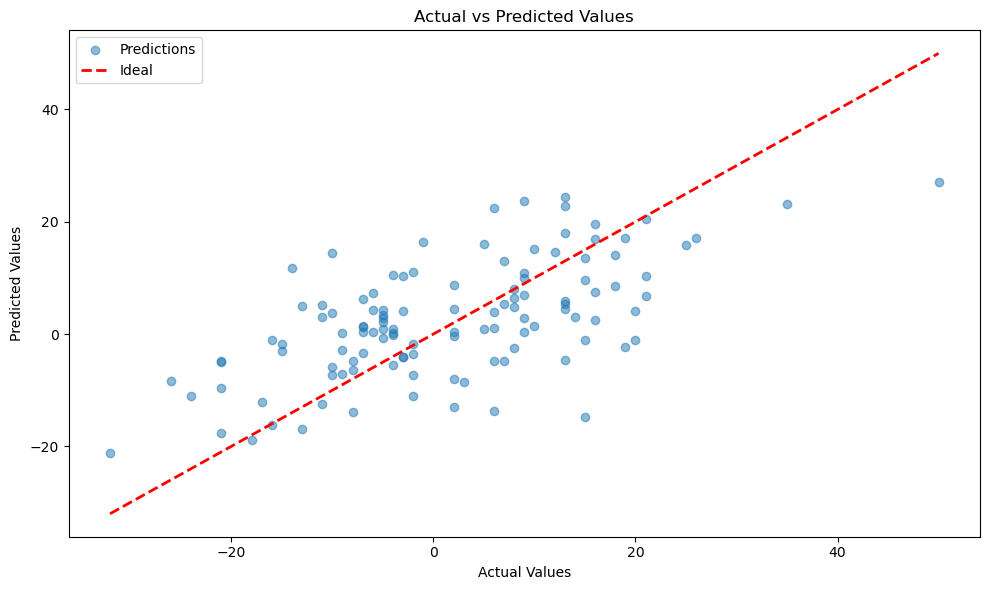

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Actual vs Predicted Values Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.tight_layout()
plt.legend()
plt.show()

OOB Score went up by 3%. This is progress!!!

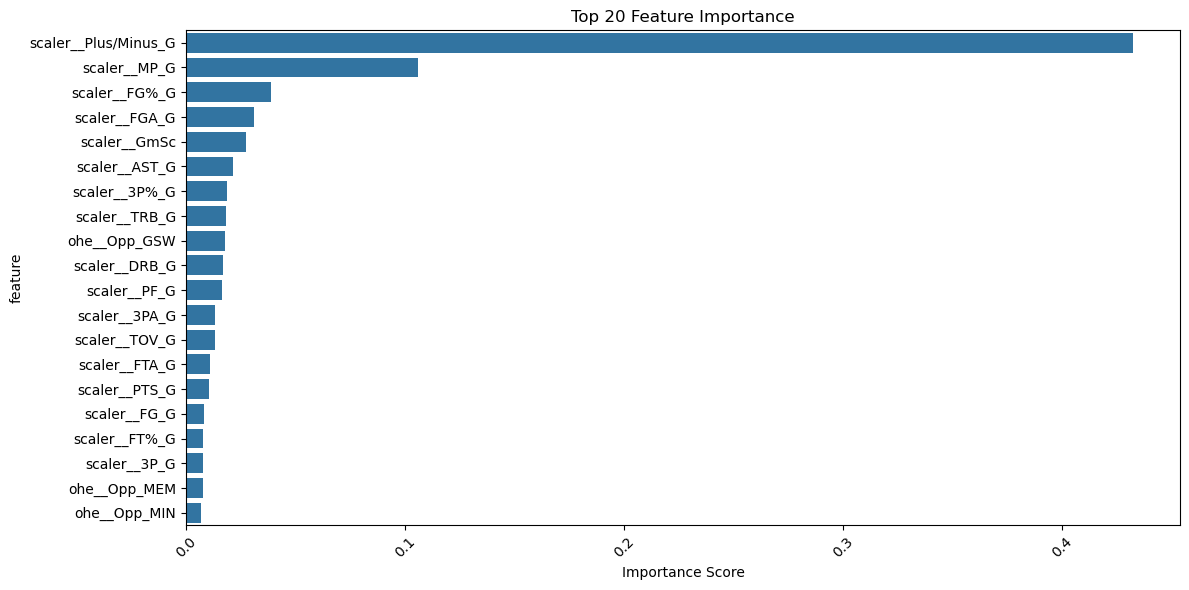

In [64]:
# Feature Importance Plot (top 20 features)
feature_names = grid_search.best_estimator_.named_steps['preprocessor'].get_feature_names_out()

feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': grid_search.best_estimator_.named_steps['regressor'].feature_importances_
})

feature_importance = feature_importance.sort_values('importance', ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Top 20 Feature Importance')
plt.xlabel('Importance Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Interpreting the Model's Performance

The Plus/Minus score per game, Minutes Player per game, Field Goal % per game, Field Goal Attempts per game, and Game Score per game are the most important for predicting the W/L Margin. 

This makes sense since Brunson got more play time after the first 2 seasons of his careeer. The plus minus score also tells us that while Brunson was on the court, his team scored more points than the other team. This is a very strong stat for measuring his impact on the team's success.

RandomForest got rid of the features highly correlated with Plus/Minus to introduce more information.

It is getting a wide scope of information from statistics that are different from one another though they may be correlated.





In [73]:
from sklearn.inspection import permutation_importance

# Get the transformed feature names after preprocessing
X_test_transformed = grid_search.best_estimator_.named_steps['preprocessor'].transform(X_test)

# Perform permutation importance on the transformed data
perm_importance = permutation_importance(
    grid_search.best_estimator_.named_steps['regressor'],  # Use only the regressor part
    X_test_transformed,  # Use transformed features
    y_test, 
    n_repeats=10, 
    random_state=42
)

# Get feature names from preprocessor
feature_names = grid_search.best_estimator_.named_steps['preprocessor'].get_feature_names_out()

# Create DataFrame of permutation importance scores
perm_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance_mean': perm_importance.importances_mean
})

sorted_importance = perm_importance_df.sort_values('importance_mean', ascending=False)

print("\nFeatures with zero or negative importance:")
print(sorted_importance[sorted_importance['importance_mean'] <= 0])

print("\nTop 10 features by permutation importance:")
print(perm_importance_df.sort_values('importance_mean', ascending=False).head(10))




Features with zero or negative importance:
                feature  importance_mean
33         ohe__Opp_WAS        -0.000004
37  ohe__Season_2021-22        -0.000030
14         ohe__Opp_HOU        -0.000040
79         scaler__DBPM        -0.000058
90       scaler__2PA_Sn        -0.000081
..                  ...              ...
48        scaler__FTA_G        -0.004355
95       scaler__FT%_Sn        -0.005099
73         scaler__USG%        -0.005732
18         ohe__Opp_MEM        -0.012358
59         scaler__GmSc        -0.022371

[68 rows x 2 columns]

Top 10 features by permutation importance:
                 feature  importance_mean
60  scaler__Plus/Minus_G         0.959611
40          scaler__MP_G         0.252008
42         scaler__FGA_G         0.029389
43         scaler__FG%_G         0.020473
52         scaler__TRB_G         0.015274
57          scaler__PF_G         0.008220
56         scaler__TOV_G         0.007274
45         scaler__3PA_G         0.006508
46         scaler__

Permutation importance scores represent the decrease in the model's performance when a feature is randomly shuffled.

In [80]:
pd.set_option('display.max_columns', 50)

#Features with zero or negative importance:
pd.DataFrame(sorted_importance[sorted_importance['importance_mean'] <= 0])


,feature,importance_mean
33,ohe__Opp_WAS,-0.000004
37,ohe__Season_2021-22,-0.000030
14,ohe__Opp_HOU,-0.000040
79,scaler__DBPM,-0.000058
90,scaler__2PA_Sn,-0.000081
...,...,...
48,scaler__FTA_G,-0.004355
95,scaler__FT%_Sn,-0.005099
73,scaler__USG%,-0.005732
18,ohe__Opp_MEM,-0.012358


The negative importance features indicate that these features are either adding noise, overfitting , or need some kind of transformation.

In [81]:
print("\nTop 10 features by permutation importance:")
pd.DataFrame(perm_importance_df.sort_values('importance_mean', ascending=False).head(10))



Top 10 features by permutation importance:


,feature,importance_mean
60,scaler__Plus/Minus_G,0.959611
40,scaler__MP_G,0.252008
42,scaler__FGA_G,0.029389
43,scaler__FG%_G,0.020473
52,scaler__TRB_G,0.015274
57,scaler__PF_G,0.008220
56,scaler__TOV_G,0.007274
45,scaler__3PA_G,0.006508
46,scaler__3P%_G,0.005779
50,scaler__ORB_G,0.005186


We want to focus on the top features. 

Let's try to use Polynomial Features to try and better fit the model to the data. This can help with balancing our weights and creating more interactions where it is meaningful to do so.

## Hyperparameter model #2

Using SelectKBest to select the top features, testing higher number of features, and limiting features wiht sqrt.

In [82]:
# Hyperparameter model #2

from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline

rf_pipeline_2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selector', SelectKBest(score_func=f_regression)),
    ('regressor', RandomForestRegressor(random_state=42,
                                        oob_score=True))
])


param_grid = {
    'feature_selector__k': [10, 20, 30],
    'regressor__n_estimators': [300, 400, 500], ## will more trees improve the model?
    'regressor__max_depth': [30],
    'regressor__max_features': ['sqrt'],
    'regressor__bootstrap': [True] 

}

grid_search_2 = GridSearchCV(rf_pipeline_2, 
                           param_grid, 
                           cv=5, 
                           scoring='r2')

grid_search_2.fit(X_train, y_train)

/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/sabrinasayed/Documents/NBA Data/.conda/lib/python3.11/site-packages/sklearn/pr

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         OneHotEncoder(sparse=False),
                                                                         ['Team',
                                                                          'Home/Away',
                                                                          'Opp',
                                                                          'Season']),
                                                                        ('scaler',
                                                                         MinMaxScaler(feature_range=(-1,
                                                                                                     1)),
                                                                         ['MP_G',
                                                                          'FG_G',
                                                                          'FGA_G',
                                                                          'FG%_G',
                                                                          '3P_G',
                                                                          '3PA_G',
                                                                          '3P%_G',
                                                                          'FT_G',
                                                                          'FTA_G',
                                                                          'FT%_G',
                                                                          'ORB_G',
                                                                          'DRB_G',
                                                                          'TRB_G',
                                                                          'AST_G',
                                                                          'STL_G',...
                                                                          'AST%', ...])])),
                                       ('feature_selector',
                                        SelectKBest(score_func=<function f_regression at 0x11cee91c0>)),
                                       ('regressor',
                                        RandomForestRegressor(oob_score=True,
                                                              random_state=42))]),
             param_grid={'feature_selector__k': [10, 20, 30],
                         'regressor__bootstrap': [True],
                         'regressor__max_depth': [30],
                         'regressor__max_features': ['sqrt'],
                         'regressor__n_estimators': [300, 400, 500]},
             scoring='r2')

In [83]:
y_pred_2 = grid_search_2.predict(X_test)
print("Best parameters found:", grid_search_2.best_params_)

print("Best cross-validation score:", grid_search_2.best_score_)

best_rf_2 = grid_search_2.best_estimator_.named_steps['regressor']
print(f"OOB Score: {best_rf_2.oob_score_}")



Best parameters found: {'feature_selector__k': 30, 'regressor__bootstrap': True, 'regressor__max_depth': 30, 'regressor__max_features': 'sqrt', 'regressor__n_estimators': 500}
Best cross-validation score: 0.2934148125384645
OOB Score: 0.26363925078138595


So this model did worse than the first hypertuned model. The main differences are setting max_features to sqrt, using SelectKBest,and increasing the number of estimators/trees.

The model benefits from having more features rather than a subset of features. 

The model does not improve after 300 trees. 

A simpler architecture would perform better. 


# Polynomial Feature Processing

Using Hyperparamet model #1, which performed the best so far, let's try to improve the model with polynomial features.



In [ ]:
perm_importance = permutation_importance(
    grid_search.best_estimator_.named_steps['regressor'],  # Use only the regressor part
    X_test_transformed,  # Use transformed features
    y_test, 
    n_repeats=10, 
    random_state=42
)

# Get feature names from preprocessor
feature_names = grid_search.best_estimator_.named_steps['preprocessor'].get_feature_names_out()

# Create DataFrame of permutation importance scores
perm_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance_mean': perm_importance.importances_mean
})

sorted_importance = perm_importance_df.sort_values('importance_mean', ascending=False)

print("\nFeatures with zero or negative importance:")
print(sorted_importance[sorted_importance['importance_mean'] <= 0])

print("\nTop 10 features by permutation importance:")
print(perm_importance_df.sort_values('importance_mean', ascending=False).head(10))

In [90]:
from sklearn.preprocessing import PolynomialFeatures

# Get top features based on permutation importance greater than .05
top_features_mask = sorted_importance['importance_mean'] > 0.02  # Example threshold
top_features = sorted_importance[top_features_mask]['feature'].tolist()

# Separate numerical and categorical features from top features
top_numerical_features = [feat for feat in numerical_features 
                         if any(num_feat in feat for num_feat in top_features)]
top_categorical_features = [feat for feat in categorical_features 
                          if any(cat_feat in feat for cat_feat in top_features)]



In [97]:
top_features = ['Plus/Minus_G', 'MP_G', 'FGA_G', 'FG%_G']
                

In [109]:
# New new preprocessor with polynomial features
poly_preprocessor = ColumnTransformer(
    transformers=[
        ('poly', Pipeline([
            ('scaler', MinMaxScaler(feature_range=(-1,1))),
            ('poly', PolynomialFeatures(degree=4, include_bias=False)), # Handle numerical features with polynomial transformation
        ]), top_features)
    ],
    remainder='drop'  # Drop other features
)


## New Pipeline with Polynomial features and Best Hyperparameters

In [110]:
poly_rf_pipeline = Pipeline([
    ('preprocessor', poly_preprocessor),
    ('regressor', RandomForestRegressor(
        random_state=42,
        oob_score=True, 
        n_estimators= 300, 
        max_depth = 30, 
        bootstrap = True
    ))
])

param_grid = {
    'regressor__n_estimators': [300],
    'regressor__max_depth': [30],
    'regressor__bootstrap': [True]
}

# Cross validation
from sklearn.model_selection import cross_val_score, cross_validate

cv_scores = cross_val_score(
    poly_rf_pipeline,
    X_train,
    y_train,
    cv=5,
    scoring='r2'
)

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")


Cross-validation scores: [0.48773315 0.2874278  0.38166291 0.48759103 0.55823575]
Mean cross-validation score: 0.4405301293867204


In [113]:
poly_rf_pipeline.fit(X_train, y_train)

# Make predictions on test set
y_pred = poly_rf_pipeline.predict(X_test)

# Final test set performance
print("\nFinal Test Set Performance:")
print(f"R2 Score: {r2_score(y_test, y_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
oob_score = poly_rf_pipeline.named_steps['regressor'].oob_score_
print(f"OOB Score: {oob_score:.4f}")



Final Test Set Performance:
R2 Score: 0.3907
MSE: 109.4669
OOB Score: 0.4262


OOB Score went down.

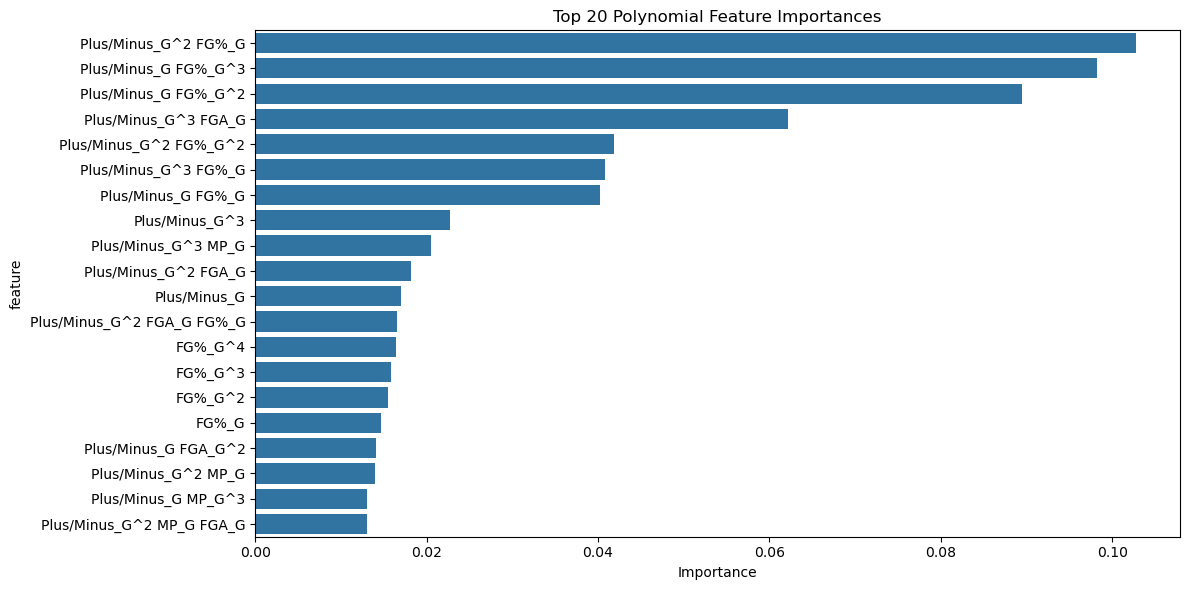

In [114]:
#Get polynomial feature names
poly_features = poly_preprocessor.named_transformers_['poly'].named_steps['poly'].get_feature_names_out(top_features)

# Get feature importances from the random forest
importances = poly_rf_pipeline.named_steps['regressor'].feature_importances_

# Create importance DataFrame
poly_importance = pd.DataFrame({
    'feature': poly_features,
    'importance': importances
}).sort_values('importance', ascending=False)

# Plot top 20 polynomial features
plt.figure(figsize=(12, 6))
sns.barplot(data=poly_importance.head(20), x='importance', y='feature')
plt.title('Top 20 Polynomial Feature Importances')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

# Revisiting our features


In [53]:
df

,Team,Home/Away,Opp,MP_G,FG_G,FGA_G,FG%_G,3P_G,3PA_G,3P%_G,...,FT%_Sn,ORB_Sn,DRB_Sn,TRB_Sn,AST_Sn,STL_Sn,BLK_Sn,TOV_Sn,PF_Sn,PTS_Sn
0,DAL,Away,PHO,19,1,3,0.333,1,3,0.333,...,0.725,0.3,2.0,2.3,3.2,0.5,0.1,1.2,1.7,9.3
1,DAL,Home,MIN,20,3,7,0.429,1,4,0.250,...,0.725,0.3,2.0,2.3,3.2,0.5,0.1,1.2,1.7,9.3
2,DAL,Home,CHI,14,2,7,0.286,2,4,0.500,...,0.725,0.3,2.0,2.3,3.2,0.5,0.1,1.2,1.7,9.3
3,DAL,Away,ATL,18,3,9,0.333,0,3,0.000,...,0.725,0.3,2.0,2.3,3.2,0.5,0.1,1.2,1.7,9.3
4,DAL,Away,TOR,29,3,11,0.273,2,4,0.500,...,0.725,0.3,2.0,2.3,3.2,0.5,0.1,1.2,1.7,9.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,NYK,Away,MIL,39,16,32,0.500,2,6,0.333,...,0.847,0.6,3.1,3.6,6.7,0.9,0.2,2.4,1.9,28.7
463,NYK,Away,CHI,42,13,24,0.542,7,12,0.583,...,0.847,0.6,3.1,3.6,6.7,0.9,0.2,2.4,1.9,28.7
464,NYK,Away,BOS,30,15,23,0.652,6,11,0.545,...,0.847,0.6,3.1,3.6,6.7,0.9,0.2,2.4,1.9,28.7
465,NYK,Home,BRK,36,10,25,0.400,3,7,0.429,...,0.847,0.6,3.1,3.6,6.7,0.9,0.2,2.4,1.9,28.7


In [ ]:
# Using the hyperparameters from the first hypertuned model

from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42,
                                        oob_score=True))
])


param_grid = {
    'regressor__n_estimators': [300], 
    'regressor__max_depth': [30],
    'regressor__bootstrap': [True] 

}

grid_search = GridSearchCV(rf_pipeline, 
                           param_grid, 
                           cv=5, 
                           scoring='r2')

grid_search.fit(X_train, y_train)